# <center> Migration is the feature of globalization !!! </center>
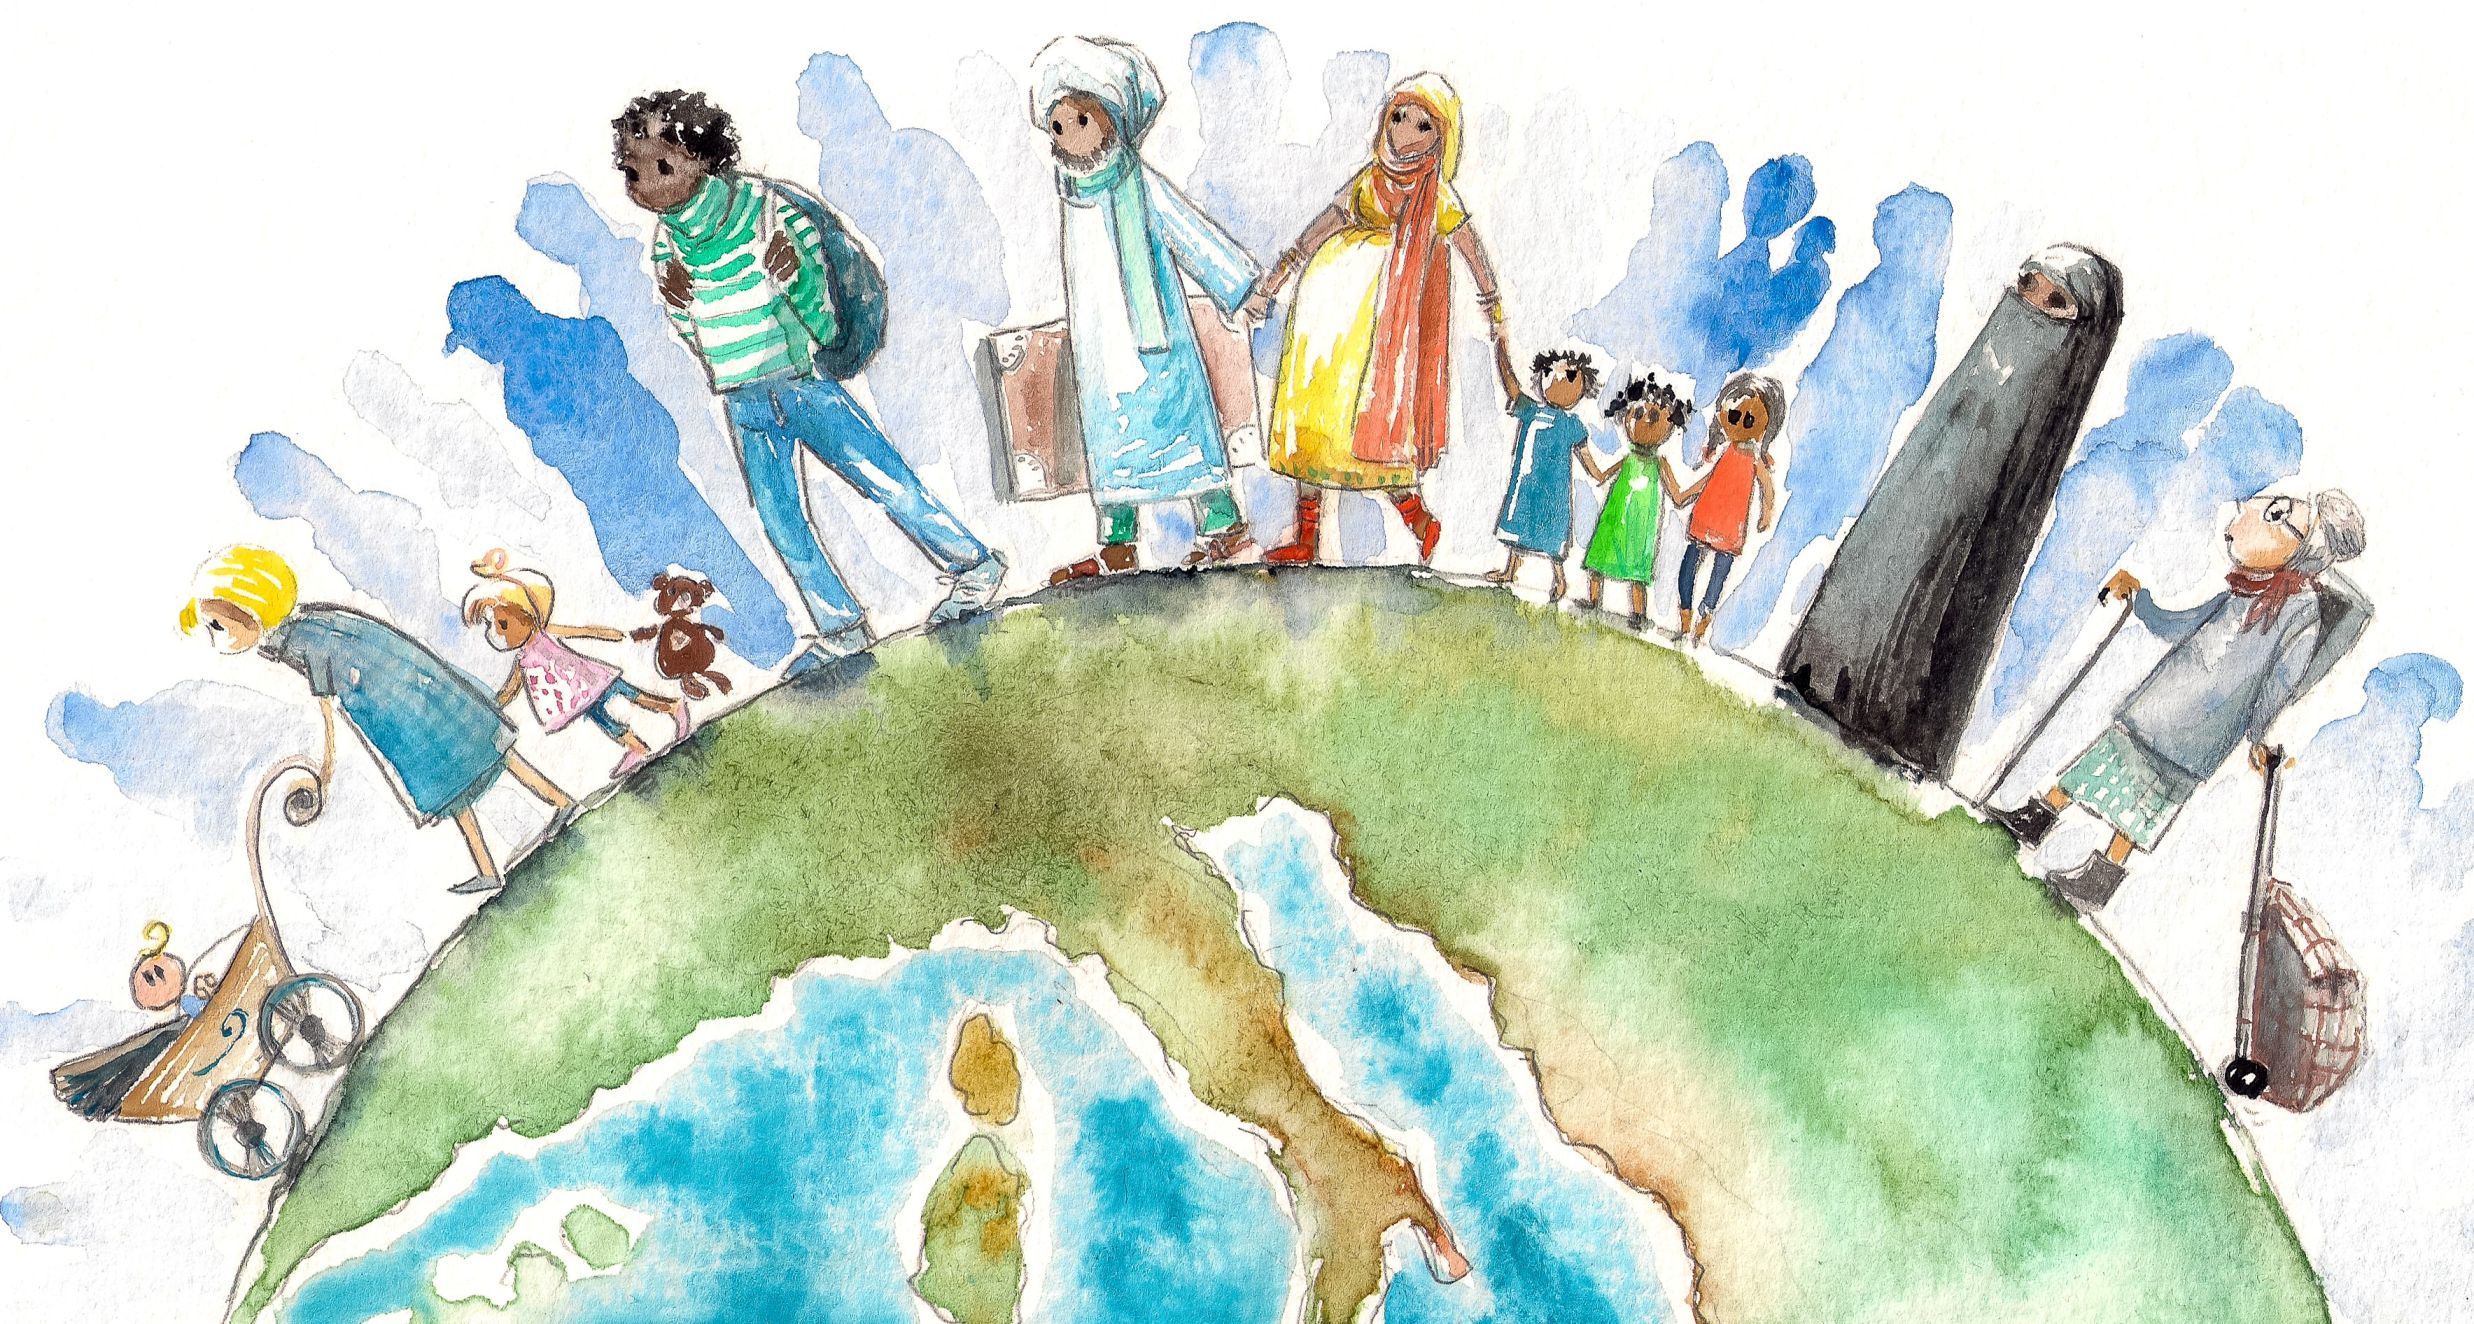

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotly
import plotly.express as px
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/indian-migration-history/IndianMigrationHistory.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
print(df["Country Origin Name"].value_counts())
print(df["Country Origin Code"].value_counts())

In [ ]:
df.drop(["Country Origin Name", "Country Origin Code", "Migration by Gender Code", "Country Dest Code"], axis = 1, inplace = True)
df.columns = ["Gender", "Destination", "Migration in 1960", "Migration in 1970", "Migration in 1980", "Migration in 1990", "Migration in 2000"]
df["Migration [1980 - 2000]"] = df.iloc[:, 4:].sum(axis = 1)
df["Total Migration [1960 - 2000]"] = df.iloc[:, 2:].sum(axis = 1)

In [ ]:
df.head()

In [ ]:
df.Destination.value_counts()

## Migration distribution for the year 1960

In [ ]:
df_1960 = pd.DataFrame({"Migration": df.groupby("Destination")["Migration in 1960"].sum()}).reset_index().sort_values("Migration", ascending = False)
fig = px.bar(df_1960, x='Destination', y='Migration', color='Migration', height = 500,width = 1100, text = 'Migration', title = "Indians Migration in the year 1960")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', size=14))
fig.show()

#### Top 3 countries Indians migrated in 1960 

* United Kingdom
* France
* Singapore

## Migration distribution for the year 1970

In [ ]:
df_1970 = pd.DataFrame({"Migration": df.groupby("Destination")["Migration in 1970"].sum()}).reset_index().sort_values("Migration", ascending = False)
fig = px.bar(df_1970, x='Destination', y='Migration', color='Migration', height = 500,width = 1100, text = 'Migration', title = "Indians Migration in the year 1970")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', size=14))
fig.show()

#### Top 3 countries Indians migrated in 1970 

* United Kingdom
* United States
* Singapore

## Migration distribution for the year 1980

In [ ]:
df_1980 = pd.DataFrame({"Migration": df.groupby("Destination")["Migration in 1980"].sum()}).reset_index().sort_values("Migration", ascending = False)
fig = px.bar(df_1980, x='Destination', y='Migration', color='Migration', height = 500,width = 1100, text = 'Migration', title = "Indians Migration in the year 1980")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', size=14))
fig.show()

#### Top 3 countries Indians migrated in 1980 

* United Kingdom
* United States
* Canada

## Migration distribution for the year 1990

In [ ]:
df_1990 = pd.DataFrame({"Migration": df.groupby("Destination")["Migration in 1990"].sum()}).reset_index().sort_values("Migration", ascending = False)
fig = px.bar(df_1990, x='Destination', y='Migration', color='Migration', height = 500,width = 1100, text = 'Migration', title = "Indians Migration in the year 1990")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', size=14))
fig.show()

#### Top 3 countries Indians migrated in 1990 

* United States
* United Kingdom
* Canada

## Migration distribution for the year 2000

In [ ]:
df_2000 = pd.DataFrame({"Migration": df.groupby("Destination")["Migration in 2000"].sum()}).reset_index().sort_values("Migration", ascending = False)
fig = px.bar(df_2000, x='Destination', y='Migration', color='Migration', height = 500,width = 1100, text = 'Migration', title = "Indians Migration in the year 2000")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', size=14))
fig.show()

#### Top 3 countries Indians migrated in 2000 

* United States
* United Kingdom
* Canada

In [ ]:
df1 = df.groupby("Destination")[["Migration in 1960", "Migration in 1970", "Migration in 1980", "Migration in 1990", "Migration in 2000"]].sum().reset_index()
x=df1["Destination"]

fig = go.Figure(data=[
    go.Bar(name='1960', x=x, y=df1["Migration in 1960"]),
    go.Bar(name='1970', x=x, y=df1["Migration in 1970"]),
    go.Bar(name='1980', x=x, y=df1["Migration in 1980"]),
    go.Bar(name='1990', x=x, y=df1["Migration in 1990"]),
    go.Bar(name='2000', x=x, y=df1["Migration in 2000"])])
fig.update_yaxes(type="log", title_text = "Migration data", nticks = 7)
fig.update_xaxes(title_text='Countries')
fig.update_layout(barmode='group', title = "Indians migration stats")
fig.show()

### Except for a few countries like France & Singapore, Indians migration to all other countries are hiked over the years

In [ ]:
fig =px.sunburst(df[df["Gender"] != "Total"],path=['Gender', 'Destination'], values='Total Migration [1960 - 2000]', title = "Migration distribution by gender")
fig.show()

### For male, the top 3 choice of country for migration is,
 
* United States
* United Kingdom
* Canada

### And for female, the top 3 choice of country for migration is,
 
* United Kingdom
* United states
* Canada

In [ ]:
df2 = df.groupby("Destination")['Total Migration [1960 - 2000]'].sum().reset_index().sort_values("Total Migration [1960 - 2000]", ascending = False)
fig = go.Figure(data=go.Scatter(x = df2['Destination'], y = df2['Total Migration [1960 - 2000]'], marker_color = df2['Total Migration [1960 - 2000]']))
fig.update_layout(title='Total migration stats from 1960 - 2000 ',  xaxis = dict(tickmode = 'linear', dtick = 1))
fig.show()

### The top 3 countries which attracted Indians the most are

* United Kingdom
* United States
* Canada

In [ ]:
dff = pd.DataFrame({"Migration": df.groupby("Destination")["Migration [1980 - 2000]"].sum()}).reset_index().sort_values("Migration", ascending = False)[:3]

In [ ]:
fig = px.bar(dff, x='Destination', y='Migration', color='Migration', height = 500,width = 800, text = 'Migration', title = "Top 3 countries Indians migrated from the year 1980 - 2000")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', size=15))
fig.show()

## End of story
Upvote this notebook if you like it and feel free to check out my other notebooks [here](https://www.kaggle.com/kamalkhumar/notebooks)<br>
À bientôt !!